# Control theory and Vicsek Model - Clustering 

# Import libraries

In [1]:
# General imports
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pandas as pd
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from IPython.display import Video, display

In [2]:
# Module imports
sys.path.append('..')
import models.vicsek as vicsek
import visualisation as visualisation
import utils

# Launching a simulation 

In [3]:
# Initialize the Vicsek model.
radius = 1
L = 50
N = 30


In [4]:
simulator = vicsek.Vicsek(numberOfParticles=N, domainSize=(L, L), radius=radius, speed=0.3)
# Simulate the Vicsek model.
simulationData = simulator.simulate(dt = 1, tmax=500)

# Extract the simulation data.
# time, positions, orientations = simulationData[0], simulationData[1], simulationData[2]

In [5]:
df = utils.simulationDataToDataframe(simulationData)
df.head()

,t,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,theta_x_25,theta_y_25,theta_x_26,theta_y_26,theta_x_27,theta_y_27,theta_x_28,theta_y_28,theta_x_29,theta_y_29
0,0.0,35.256384,33.042248,49.370798,20.634800,14.397525,20.374675,23.668453,1.951683,24.334556,...,-0.594505,0.804092,-0.757523,-0.652808,0.223223,-0.974767,-0.972359,0.233489,-0.500890,0.865511
1,1.0,35.038723,32.835792,49.336805,20.932868,14.294948,20.092756,23.564977,2.233273,24.139421,...,-0.641120,0.767441,-0.683637,-0.729822,0.646228,-0.763144,-0.879878,-0.475200,0.102826,0.994699
2,2.0,34.835689,32.614937,49.338418,21.232864,14.262161,19.794553,23.422632,2.497352,23.902703,...,-0.627429,0.778674,-0.834880,-0.550432,0.249112,-0.968475,-0.979963,-0.199182,0.020237,0.999795
3,3.0,34.618819,32.407651,49.423052,21.520678,14.235156,19.495771,23.360127,2.790768,23.706942,...,-0.696170,0.717877,-0.797976,-0.602690,-0.090094,-0.995933,-0.689069,-0.724696,-0.678695,0.734420
4,4.0,34.425557,32.178195,49.683786,21.669061,14.238298,19.195787,23.365686,3.090717,23.448435,...,-0.620613,0.784117,-0.739154,-0.673537,-0.511977,-0.858999,-0.713795,-0.700354,-0.721975,0.691919


# Plotting clusters over time 

In [6]:
start = 0 # Start ITERATION
end = 150 # End ITERATION
df2 = df.loc[start:end]
df2.tail()

,t,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,theta_x_25,theta_y_25,theta_x_26,theta_y_26,theta_x_27,theta_y_27,theta_x_28,theta_y_28,theta_x_29,theta_y_29
146,146.0,21.337105,18.365308,11.175707,6.061203,34.256698,26.520803,7.706721,10.002221,32.965209,...,-0.919969,-0.391990,-0.916718,0.399534,0.123800,-0.992307,-0.689053,0.724711,-0.077347,-0.997004
147,147.0,21.101501,18.179592,11.125514,5.765432,33.974349,26.419418,7.425431,10.106510,33.121223,...,-0.818486,-0.574527,-0.959463,0.281833,0.254217,-0.967147,-0.712043,0.702136,0.244994,-0.969525
148,148.0,20.830783,18.050317,11.029651,5.481160,33.677424,26.462265,7.153883,10.234030,33.307225,...,-0.928806,-0.370567,-0.745834,0.666132,0.109103,-0.994030,-0.964341,0.264662,-0.003772,-0.999993
149,149.0,20.601334,17.857048,10.922721,5.200864,33.377494,26.455799,6.854676,10.212223,33.523773,...,-0.968013,-0.250900,-0.978565,0.205940,-0.147626,-0.989043,-0.978814,0.204752,0.067177,-0.997741
150,150.0,20.439681,17.604326,10.936021,4.901159,33.077505,26.453252,6.562602,10.280727,33.767176,...,-0.976692,-0.214644,-0.993994,-0.109431,0.305263,-0.952268,-0.921479,0.388429,-0.265382,-0.964143


In [7]:
from matplotlib import animation 

## Cluster of bird over time 

In [8]:
df_labels = utils.clusters_over_time(df, k_coef=2, L=L, min_samples=4)
# df_labels.to_csv('data/vicsek_labels.csv', index=False)

In [9]:
matLabels = df_labels.to_numpy()
color = []
for i, labels in enumerate(matLabels):
    color.append( utils.coloring_clusters(labels, cmap_name='hsv') )
color = np.array(color)
color.shape

(501, 30, 4)

In [10]:
# TODO : Animation of the simulation 


In [11]:
# Alphanumeric heuristic # - DOES NOT WORK 
def permute(line): 

    max = int(np.max(line))
    min = int(np.min(line)) 
    UNVISITED = -2
    permutation = np.zeros((max-min+1)) + UNVISITED
    for i in range(len(line)): 
        if permutation[int(line[i]-min)] == UNVISITED:
            permutation[int(line[i]-min)] = line[i]
        else :
            line[i] = permutation[int(line[i]-min)]
    return line



In [12]:
eff, noise = utils.cluster_effectif(df_labels)


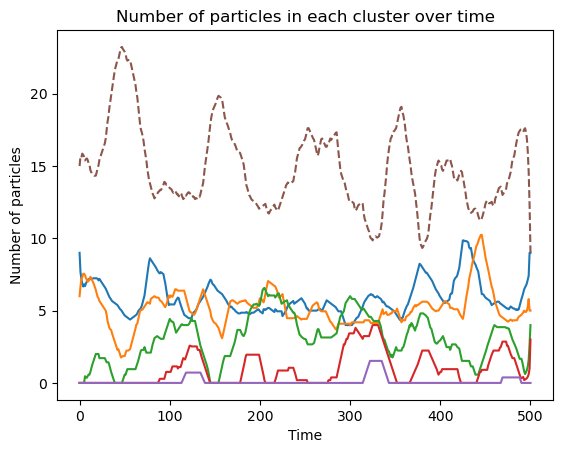

In [13]:
visualisation.plot_cluster_size_over_time(df_labels, smoothness=10)
plt.show()


In [14]:
# df_centroids = pd.read_csv('../data_test/new_labels_centroids.csv')
# df_contribution = pd.read_csv("../data_test/new_labels_contribions.csv")
df_centroids = utils.correct_labels_optimal_assignment(df_labels, df, "centroid", L)
df_contribution = utils.correct_labels_optimal_assignment(df_labels, df, "contribution", L)

# similarity 
centroidMat = df_centroids.to_numpy()
contributionMat = df_contribution.to_numpy()

# count all equal labels 
np.sum(centroidMat == contributionMat) / (centroidMat.shape[0] * centroidMat.shape[1])

0.8506320691949435

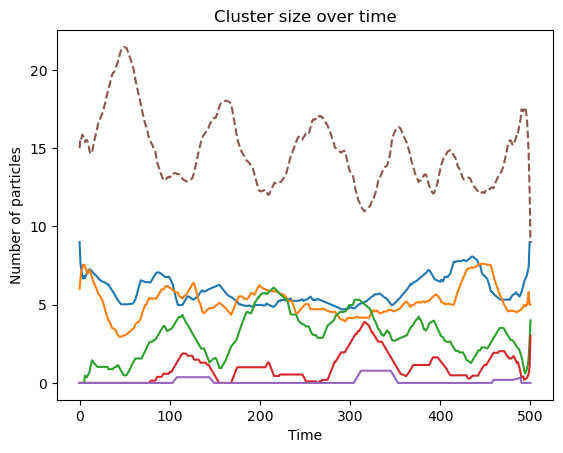

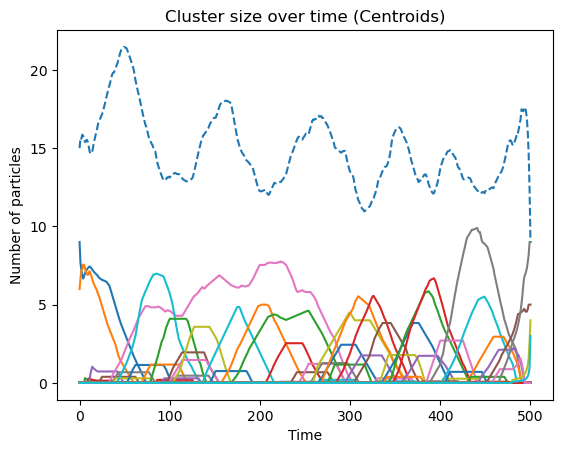

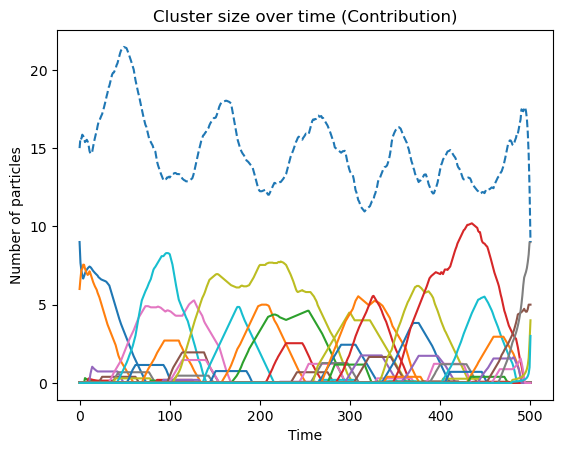

In [15]:
fig, ax = visualisation.plot_cluster_size_over_time(df_labels)
ax.set(title='Cluster size over time')
plt.show()
fig, ax = visualisation.plot_cluster_size_over_time(df_centroids)
ax.set(title='Cluster size over time (Centroids)')
plt.show()
fig, ax = visualisation.plot_cluster_size_over_time(df_contribution)
ax.set(title='Cluster size over time (Contribution)')   
plt.show()